# __packages__

In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from spotify_api import SpotifyAPI

pickle_path_tracks = "./sampled_data/sampled_data_tracks_final.pickle"
pickle_path_track_artist = "./sampled_data/sampled_data_track_artist_final.pickle"

genre_list = [
    "rock",
    "hip hop",
    "pop",
    "jazz",
    "blues",
    "country",
    "metal",
    "reggae",
    "folk",
    "soul",
    "edm",
    "dance",
    "latin",
    "funk" 
]

---
# __data__

### 1) load source data (tracks and track_artist)
### 2) create dataframes by genres

In [2]:
tracks = pd.read_pickle(pickle_path_tracks)
tracks["other_genre"] = ~tracks.genres_combined.str.contains("(" + "|".join(genre_list) + ")")

track_artist = pd.read_pickle(pickle_path_track_artist)

df_list = []

for genre in genre_list:
    
    tmp = tracks.loc[tracks.genres_combined.str.contains(genre)]
    print(f"{genre} shape: {tmp.shape}")
    df_list.append((genre, tmp.copy()))
    
df_list.append(("other", tracks.loc[tracks.other_genre]))
print(f"other shape: {tracks.loc[tracks.other_genre].shape}")


/var/folders/9q/nynv72513xz5vlp8cpcm790r0000gn/T/ipykernel_94020/2682881059.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tracks["other_genre"] = ~tracks.genres_combined.str.contains("(" + "|".join(genre_list) + ")")


rock shape: (16713, 29)
hip hop shape: (12782, 29)
pop shape: (34954, 29)
jazz shape: (1934, 29)
blues shape: (1057, 29)
country shape: (3360, 29)
metal shape: (4452, 29)
reggae shape: (3205, 29)
folk shape: (3348, 29)
soul shape: (3131, 29)
edm shape: (3084, 29)
dance shape: (7509, 29)
latin shape: (6220, 29)
funk shape: (1576, 29)
other shape: (27975, 29)


---
# __scaling__

### 

In [3]:
col_list = [
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "mode",
    "speechiness",
    "tempo",
    "time_signature",
    "valence"
]

scaled_features_list = []

for df_name, df in df_list:
    print(f"{df_name}")
    
    scaler_tmp = StandardScaler()
    
    scaler_source = df[col_list].to_numpy()
    scaler_tmp.fit(scaler_source)
    scaled_features_tmp = scaler_tmp.transform(scaler_source)
    
    scaled_features_list.append((df_name, copy.deepcopy(scaler_tmp), copy.deepcopy(scaled_features_tmp)))
    

rock
hip hop
pop
jazz
blues
country
metal
reggae
folk
soul
edm
dance
latin
funk
other


df_name: rock


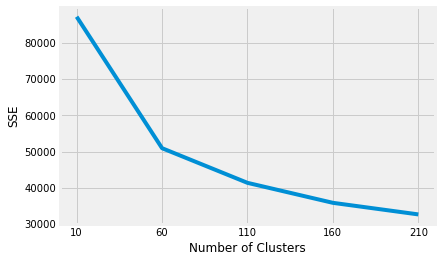

df_name: hip hop


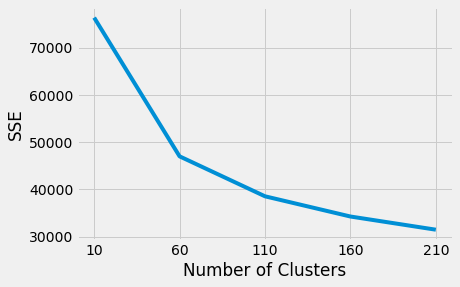

df_name: pop


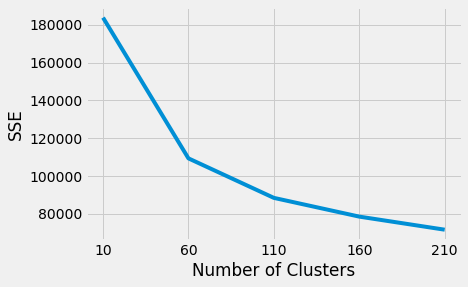

df_name: jazz


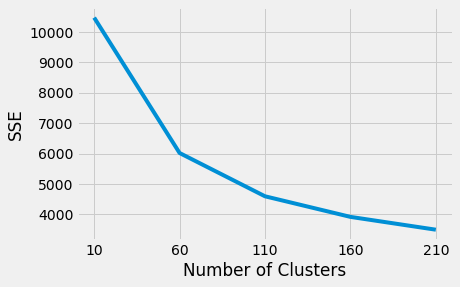

df_name: blues


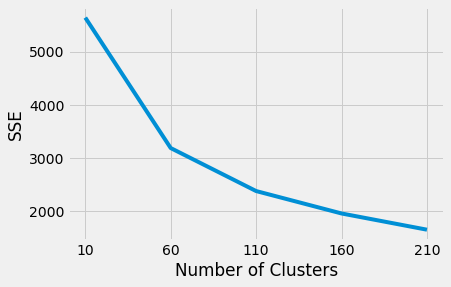

df_name: country


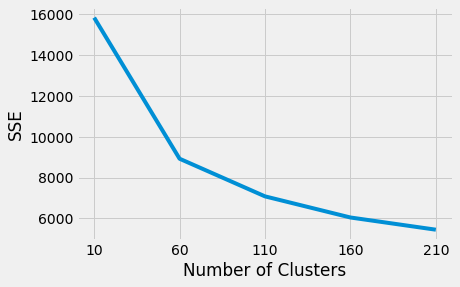

df_name: metal


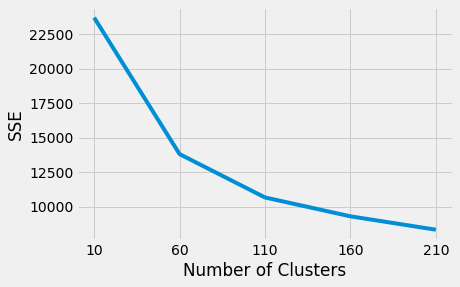

df_name: reggae


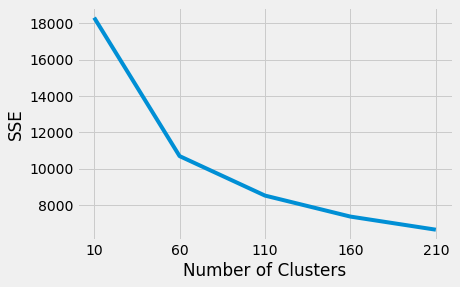

df_name: folk


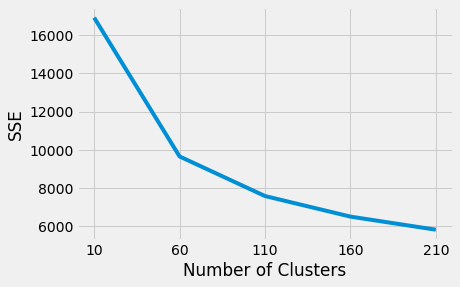

df_name: soul


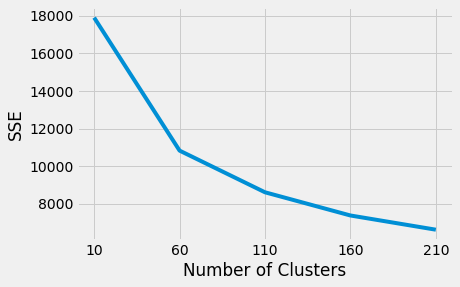

df_name: edm


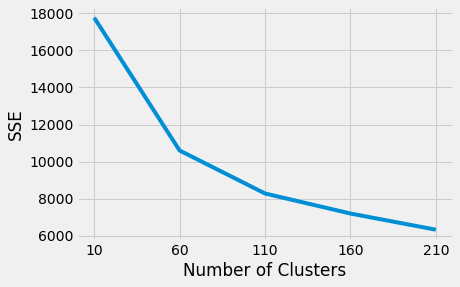

df_name: dance


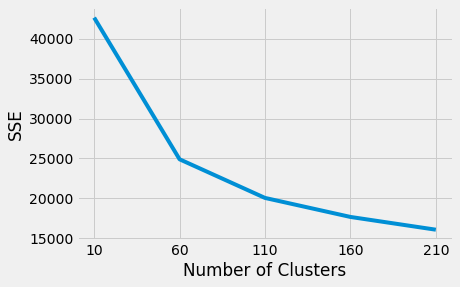

df_name: latin


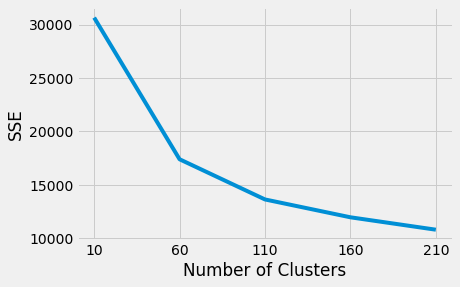

df_name: funk


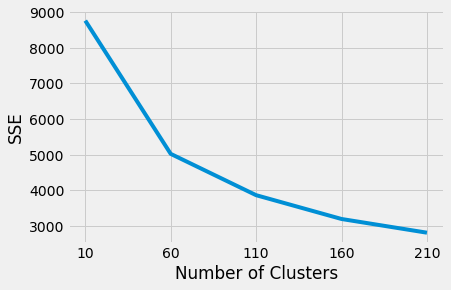

df_name: other


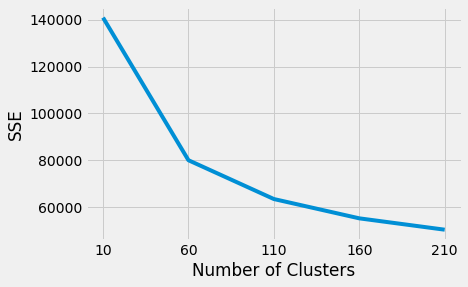

In [4]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2022,
}

# A list holds the SSE values for each k
plot_range = range(10, 250, 50)

for df_name, scaler, scaled_features in scaled_features_list:
    print(f"df_name: {df_name}")
    sse = []
    for k in plot_range:
        if k != 10:
            k = k - 10
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)


    plt.style.use("fivethirtyeight")
    plt.plot(plot_range, sse)
    plt.xticks(plot_range)
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

In [5]:
k_parameter_list = []

for genre in genre_list + ["others"]:
    
    if genre in ["rock", "hip hop", "pop", "others"]:
        k_parameter_list.append((genre, 110))
    else:
        k_parameter_list.append((genre, 60))

display(k_parameter_list)

[('rock', 110),
 ('hip hop', 110),
 ('pop', 110),
 ('jazz', 60),
 ('blues', 60),
 ('country', 60),
 ('metal', 60),
 ('reggae', 60),
 ('folk', 60),
 ('soul', 60),
 ('edm', 60),
 ('dance', 60),
 ('latin', 60),
 ('funk', 60),
 ('others', 110)]

---
# __models__

In [6]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2022,
}

kmeans_model_list = []

for genre, k in k_parameter_list:
    print(f"genre: {genre}, k: {k}")
    for df_name, scaler, scaled_features in scaled_features_list:
        if genre == df_name:
            
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(scaled_features)
            kmeans_model_list.append((genre, copy.deepcopy(kmeans)))

genre: rock, k: 110
genre: hip hop, k: 110
genre: pop, k: 110
genre: jazz, k: 60
genre: blues, k: 60
genre: country, k: 60
genre: metal, k: 60
genre: reggae, k: 60
genre: folk, k: 60
genre: soul, k: 60
genre: edm, k: 60
genre: dance, k: 60
genre: latin, k: 60
genre: funk, k: 60
genre: others, k: 110


---
# __test__

In [7]:
ids_list = [
    ("coldplay", "viva la vida", "1mea3bSkSGXuIRvnydlB5b"),
    ("taylor swift", "midnight rain", "1DAHLigfUqSLrU3RLG1EKR"),
    ("taylor swift", "you belong with me", "3GCL1PydwsLodcpv0Ll1ch"),
    ("eminem", "8 mile", "2552neNWWQ2i2XZwPi5B3G"),
    ("eminem", "lose yourself", "77Ft1RJngppZlq59B6uP0z"),
    ("drake", "hotline bling", "0wwPcA6wtMf6HUMpIRdeP7"),
    ("jung kook", "dreamers", "1RDvyOk4WtPCtoqciJwVn8")
]

spotify = SpotifyAPI()
spotify.get_token()


response_tracks = spotify.get_query_by_ids("tracks", [tup[2] for tup in ids_list])
response_audio_features = spotify.get_query_by_ids("audio-features", [tup[2] for tup in ids_list])
artists_list = [track["artists"][0]["id"] for track in response_tracks["tracks"]]
response_artists = spotify.get_query_by_ids("artists", artists_list)

response status code: 200


In [8]:

test_row_list = []

for tup, response_dict in zip(ids_list, response_audio_features["audio_features"]):
    tmp_dict = {}
    tmp_dict.update({"track_id": tup[-1], "track_name": tup[1], "artist": tup[0]})
    tmp_dict.update(response_dict)
    
    test_row_list.append(tmp_dict.copy())
    
test_df = pd.DataFrame(test_row_list)
test_df = test_df[["track_id", "track_name", "artist"] + col_list]

artist_row_list = []

for tup, response_dict in zip(ids_list, response_artists["artists"]):
    tmp_dict = {}
    tmp_dict.update({"track_id": tup[-1]})
    tmp_dict.update({"genres_combined": ",".join(response_dict["genres"])})
    
    artist_row_list.append(tmp_dict.copy())
    
tmp_df = pd.DataFrame(artist_row_list)
test_df = pd.merge(test_df, tmp_df, how="left", on="track_id")

test_df["genre_list"] = test_df.genres_combined.str.findall("(" + "|".join(genre_list) + ")").apply(set)

display(test_df)


,track_id,track_name,artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genres_combined,genre_list
0,1mea3bSkSGXuIRvnydlB5b,viva la vida,coldplay,0.09540,0.486,0.617,0.000003,0.1090,-7.115,0,0.0287,138.015,4,0.417,"permanent wave,pop",{pop}
1,1DAHLigfUqSLrU3RLG1EKR,midnight rain,taylor swift,0.72300,0.638,0.369,0.000053,0.1150,-11.711,1,0.0737,139.932,4,0.183,pop,{pop}
2,3GCL1PydwsLodcpv0Ll1ch,you belong with me,taylor swift,0.16200,0.687,0.783,0.000013,0.1140,-4.440,1,0.0386,129.964,4,0.443,pop,{pop}
3,2552neNWWQ2i2XZwPi5B3G,8 mile,eminem,0.12500,0.740,0.940,0.000083,0.1320,-4.195,1,0.2850,89.981,4,0.489,"detroit hip hop,hip hop,rap",{hip hop}
4,77Ft1RJngppZlq59B6uP0z,lose yourself,eminem,0.00922,0.689,0.735,0.000720,0.3650,-4.545,1,0.2670,171.403,4,0.059,"detroit hip hop,hip hop,rap",{hip hop}
5,0wwPcA6wtMf6HUMpIRdeP7,hotline bling,drake,0.00258,0.891,0.628,0.000190,0.0504,-7.863,1,0.0551,134.966,4,0.552,"canadian hip hop,canadian pop,hip hop,rap,toro...","{hip hop, pop}"
6,1RDvyOk4WtPCtoqciJwVn8,dreamers,jung kook,0.15800,0.710,0.879,0.001420,0.4390,-4.218,1,0.0422,114.993,4,0.341,k-pop,{pop}


In [9]:
test_scaled_features_list = []

for i, row in test_df.iterrows():
    
    for genre in row["genre_list"]:
        
        for df_name, scaler, scaled_features in scaled_features_list:
            
            if genre == df_name:
                scaled_features_tmp = scaler.transform(row[col_list].to_numpy().reshape(1, -1))
                test_scaled_features_list.append((genre, copy.deepcopy(scaled_features_tmp)))


In [10]:
predicted_list = []

for genre, scaled_feature in test_scaled_features_list:
    
    for df_name, kmeans in kmeans_model_list:
        
        if genre == df_name:
            predicted_list.append((genre, kmeans.predict(scaled_feature)[0]))

In [11]:
concat_list = []
random_state = 2022

for predicted in predicted_list:
    
    genre_df = [df for genre, df in df_list if genre == predicted[0]]
    kmeans_model = [kmeans for genre, kmeans in kmeans_model_list if genre == predicted[0]]

    concat_list.append(copy.deepcopy(genre_df[0].iloc[np.where(kmeans_model[0].labels_ == predicted[1])].sample(1, random_state=random_state)))
    
final = pd.concat(concat_list)

display(final)

,track_id,album_id,disc_number,duration_ms,explicit,track_name,album_popularity,track_number,duration_m,release_date,...,speechiness,tempo,time_signature,valence,genres,artist_popularity,genres_combined,artist_name_combined,artist_popularity_max,other_genre
105533,7fzkwV4lfFdaImzLLRarA3,4ZViAZBx7M4vleeGgaNSMI,1,275440,False,Wolf & I,34,6,4.590667,2011-03-11,...,0.0363,134.754,4,0.101,"[electropop, metropopolis]",39,"electropop,metropopolis",Oh Land,39,False
69879,4xHkj5OuwbhJ3VhbW09Xxt,3vcFOmCrmZnXeyx7gJ8L1s,1,200981,False,A Escondidas,37,11,3.349683,2017-04-28,...,0.0283,131.968,4,0.210,"[latin arena pop, mexican pop, sonora indie]",46,"latin arena pop,mexican pop,sonora indie",Lucah,46,False
94439,6glFKVBWmop3Aw8jEIF0hd,2cXsxv2Z8rLDV96vjTDGcb,1,186163,False,Gladiator,32,3,3.102717,2016-07-29,...,0.0681,124.907,4,0.477,"[post-teen pop, social media pop]",43,"post-teen pop,social media pop",The Girl and The Dreamcatcher,43,False
22443,1apVaGOr4BUgSdWG81CIv4,3UCtCwB9nl9meUYM52Z8t5,1,179534,True,Chanson française,44,8,2.992233,2015,...,0.4060,87.004,4,0.796,"[francoton, french hip hop, pop urbaine, rap c...",55,"francoton,french hip hop,pop urbaine,rap consc...",Youssoupha,55,False
50958,3buQGKqVsWEaYibrbViaCx,2Qvup4Tfqt5r7icH44mx9s,1,179612,True,Magazine,32,7,2.993533,2016-06-17,...,0.3220,155.193,4,0.240,"[deep underground hip hop, kentucky hip hop, p...",81,"deep underground hip hop,kentucky hip hop,pop,rap",Jack Harlow,81,False
90787,6RI55EbhlxnXhOK27AI8WZ,2q0B1JTgZRAh7xVEZfJRg8,1,171853,True,Erica Kane,44,5,2.864217,2014-09-02,...,0.0445,136.892,4,0.615,"[melodic rap, south carolina hip hop, southern...",52,"melodic rap,south carolina hip hop,southern hi...",Speaker Knockerz,52,False
95427,6l5EnqPcPqQJluoJaT9z3f,3j8iyHi0RxqLLV97ZGOCPm,1,211400,False,Magudi Magudi,43,7,3.523333,2012-12-14,...,0.0968,120.050,4,0.636,"[desi pop, filmi, modern bollywood]",79,"desi pop,filmi,modern bollywood,filmi,filmi,ma...","A.R. Rahman,Tanvi Shah,Chinmayi",79,False
47366,3Mbvwfcmfr4k0yYtMatnsA,2ESc204TZmoBLPDfqNVYFY,1,221585,False,Penge Kommer Går,34,6,3.693083,2015-05-18,...,0.0413,129.946,4,0.218,"[danish hip hop, danish pop]",65,"danish hip hop,danish pop",Gilli,65,False


# __result__


Sounds similar:
<br>

Midnight Rain by Taylor Swift & Rumors by Adam Labmert (pop)
<br>

Lose Yourself by Eminem & Get Mine by Yelawolf (hip hop)
<br>

Dreamers by Jung Kook & Te Bese by Leonel Garcia
<br>